### Determine thresholds

In [1]:
from ioMicro import *

In [2]:
dec = decoder_simple(r"Y:\DCBBL1_3_15_2023__GFP\MERFISH_Analysis")

In [3]:
dec.get_fovs_sets()
len(dec.fov_sets)

363

In [9]:
def combine_cell_counts(save_folder = r"Y:\DCBBL1_3_15_2023__GFP\MERFISH_Analysis",pixel_size = 0.108*4):
    

In [38]:
def cts_fl_to_ifov_iset(ct_fl):
    fov,set_=os.path.basename(ct_fl).replace('ctspercell_','').split('.')[0].split('--')
    ifov = int(fov.split('__')[-1])
    iset = int(set_.split('set')[-1])
    return ifov,iset

In [44]:
save_folder = r"Y:\DCBBL1_3_15_2023__GFP\MERFISH_Analysis"
pixel_size = 0.108*4
cts_fls = glob.glob(save_folder+os.sep+'ctspercell_*')
Xcells,vols,icells = [],[],[]
cts_all = []
for fl in tqdm(cts_fls):
    dic = np.load(fl)
    Xcells_ = dic['Xcells']
    Xfov = dic['Xfov']
    icells_ = dic['icells']
    vols_ = dic['vols']
    gns_all=dic['gns_all']
    Xcells.extend(Xcells_[:,1:]*pixel_size+Xfov[::-1]*[1,-1])
    vols.extend(vols_)
    ifov,iset = cts_fl_to_ifov_iset(fl)
    icells.extend(10**6*ifov+10**10*iset+icells_)
    cts_all.extend(dic['cts_all'].T)
Xcells = np.array(Xcells)
icells = np.array(icells)
vols = np.array(vols)
cts_all = np.array(cts_all)
    #np.savez(save_fl_final,gns_all=gns_all,cts_all=cts_all,vols=dec.vols,Xcells=Xcells,Xfov=[dec.xfov,dec.yfov],icells = dec.icells)

100%|████████████████████████████████████████████████████████████████████████████████| 363/363 [00:30<00:00, 11.75it/s]


In [46]:
np.savez(save_folder+os.sep+'finalctspercell.npz',cts_all=cts_all,Xcells=Xcells,icells=icells,vols=vols,gns_all=gns_all)

In [76]:
gns_all[-300:]


array(['blank0280', 'blank0281', 'blank0282', 'blank0283', 'blank0284',
       'blank0285', 'blank0286', 'blank0287', 'blank0288', 'blank0289',
       'blank0290', 'blank0291', 'blank0292', 'blank0293', 'blank0294',
       'blank0295', 'blank0296', 'blank0297', 'blank0298', 'blank0299',
       'blank0300', 'Acer3', 'Actg1', 'Adcy2', 'Ahcyl2', 'Aldoc', 'Ascl1',
       'Auts2', 'Bhlhe22', 'Bmp2', 'Bsg', 'C1qa', 'Calb1', 'Cck', 'Cdh12',
       'Cdk4', 'Chrdl1', 'Cnr1', 'Csmd1', 'Cst3', 'Dgat2', 'Dlx1', 'Dsp',
       'Eif4a2', 'Emx2', 'Eomes', 'Fam107a', 'Flt1', 'Foxa2', 'Foxg1',
       'Gabbr1', 'Gad1', 'Gja1', 'Gpc4', 'Grb14', 'Grin2c', 'Hapln2',
       'Hmgn3', 'Id3', 'Igfbpl1', 'Kcnd2', 'Lhx3', 'Lockd', 'Lrp1b',
       'Mal', 'Mapk4', 'Mbp', 'Mgat4c', 'Mrc1', 'Myc', 'Nckap5',
       'Neurod1', 'Neurod6', 'Nfia', 'Nkain4', 'Nog', 'Npy2r', 'Nrgn',
       'Ntng1', 'Ogt', 'Olr1', 'Padi2', 'Pam', 'Pde1a', 'Plekha1', 'Pnoc',
       'Prox1', 'Ptbp2', 'Rasl10a', 'Reln', 'Riiad1', 'Rpl38', 'S1p

In [128]:
gene = 'GFP_Ab1_th'
ign = list(gns_all).index(gene)
cts_ = cts_all[:,ign]
nmax=15
#nmax= np.percentile(cts_,99)
cnorm=np.clip(cts_/nmax,0,1)
size = 10+cnorm*20
import matplotlib.cm as cmap
col = cmap.coolwarm(cnorm)
args = np.argsort(cnorm)
napari.view_points(Xcells[args,::-1],face_color=col[args],size=size[args],name=gene);

In [ ]:
import scanpy as sc

In [129]:
gns_all

array(['blank0001', 'blank0002', 'blank0003', 'blank0004', 'blank0005',
       'blank0006', 'blank0007', 'blank0008', 'blank0009', 'blank0010',
       'blank0011', 'blank0012', 'blank0013', 'blank0014', 'blank0015',
       'blank0016', 'blank0017', 'blank0018', 'blank0019', 'blank0020',
       'blank0021', 'blank0022', 'blank0023', 'blank0024', 'blank0025',
       'blank0026', 'blank0027', 'blank0028', 'blank0029', 'blank0030',
       'blank0031', 'blank0032', 'blank0033', 'blank0034', 'blank0035',
       'blank0036', 'blank0037', 'blank0038', 'blank0039', 'blank0040',
       'blank0041', 'blank0042', 'blank0043', 'blank0044', 'blank0045',
       'blank0046', 'blank0047', 'blank0048', 'blank0049', 'blank0050',
       'blank0051', 'blank0052', 'blank0053', 'blank0054', 'blank0055',
       'blank0056', 'blank0057', 'blank0058', 'blank0059', 'blank0060',
       'blank0061', 'blank0062', 'blank0063', 'blank0064', 'blank0065',
       'blank0066', 'blank0067', 'blank0068', 'blank0069', 'blan

(array([7.00177174e-01, 1.06431201e-01, 6.66835404e-02, 4.07040957e-02,
        2.38107839e-02, 1.42797975e-02, 6.78401595e-03, 3.68116276e-03,
        1.90174873e-03, 9.45313698e-04, 4.67096180e-04, 2.33548090e-04,
        1.77941402e-04, 1.11213376e-04, 7.78493634e-05, 6.67280258e-05,
        3.33640129e-05, 5.56066881e-05, 3.33640129e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.11213376e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]),
 array([ 0.        ,  1.03448276,  2.06896552,  3.10344828,  4.13793103,
         5.17241379,  6.20689655,  7.24137931,  8.27586207,  9.31034483,
        10.34482759, 11.37931034, 12.4137931 , 13.44827586, 14.48275862,
        15.51724138, 16.55172414, 17.5862069 , 18.62068966, 19.65517241,
        20.68965517, 21.72413793, 22.75862069, 23.79310345, 24.82758621,
        25.86206897, 26.89655172, 27.93103448, 28.96551724, 30.        ]),
 <BarContainer object of 29 ar

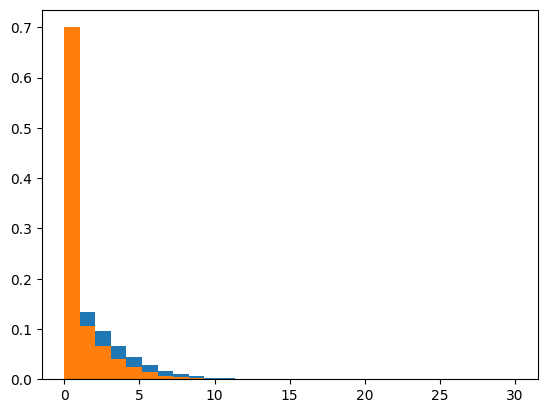

In [118]:
plt.hist(cts_all[icells//10**10==1,ign],bins=np.linspace(0,30,30),density='True')
plt.hist(cts_all[icells//10**10==2,ign],bins=np.linspace(0,30,30),density='True')


In [95]:
gns_all[:-3]

array(['Vim', 'Wdr17', 'Wnt8b', 'Zbtb20', 'Aldh1l1'], dtype='<U12')

'Nrgn'

In [26]:

import napari

napari.view_points(Xcells)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 1173.6829720725132, 543.1122779850748), zoom=0.1721526431317588, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=2, ndisplay=2, last_used=0, range=((-2366.344, 4714.709944145026, 1.0), (-5455.380249999999, 6542.604805970149, 1.0)), current_step=(3540, 5998), order=(0, 1), axis_labels=('0', '1')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Points layer 'Xcells' at 0x22a3c245fa0>], scale_bar=ScaleBar(visible=False, colored=False, color=array([1., 0., 1., 1.], dtype=float32), ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10.0, box=False, box_color=array([0. , 0. , 0. , 0.6], dtype=float32), unit=None), text_overlay=TextOverlay(visible=False, color=array([0.5, 0.5, 0.5, 1. ], dtype=float32), font_size=10

In [ ]:
cts_fls = glob.glob(save_folder+os.sep+'ctspercell_*')
    
for fl in cts_fls:
    dic = np.load(fl)
    Xcells = dic['Xcells']
    Xfov = dic['Xfov']
    icells_ = dic['icells']

In [4]:
test = []
for dec.fov,dec.set_ in tqdm(dec.fov_sets):
    save_fl_final = dec.save_folder+os.sep+'ctspercell_'+dec.fov.split('.')[0]+'--'+dec.set_+'.npz'
    test.append(os.path.exists(save_fl_final))

100%|██████████████████████████████████████████████████████████████████████████████| 363/363 [00:00<00:00, 1117.82it/s]


In [7]:
len(glob.glob(dec.save_folder+os.sep+'ctspercell_*'))

363

### Calculate for each cell the good decoding spots

In [6]:
dec.fov,dec.set_ = 'Conv_zscan__111','_set1'
for dec.fov,dec.set_ in tqdm(dec.fov_sets):
    save_fl_final = dec.save_folder+os.sep+'ctspercell_'+dec.fov.split('.')[0]+'--'+dec.set_+'.npz'
    if not os.path.exists(save_fl_final):
        try:
            dec.decoded_fl = dec.save_folder+os.sep+'decoded_'+dec.fov.split('.')[0]+'--'+dec.set_+'.npz'
            load_segmentation(dec)
            dec.load_decoded()
            apply_fine_drift(dec,plt_val=False)
            for i in range(3):
                apply_brightness_correction(dec)
            get_scores(dec,plt_val=False)
            dec.th=-0.75
            #plot_1gene(dec,gene='Gad1',viewer = None)


            keepf=  dec.scoreA>-0.75 ### keep good score
            XHf = np.mean(dec.XH_pruned[keepf],axis=1)
            icodesf = dec.icodesN[keepf]
            dec.icells = np.unique(dec.im_segm_)
            dec.icells = dec.icells[dec.icells>0]
            cts_all = []
            gns_all = []
            for ign,gn in enumerate(tqdm(dec.gns_names)):
                Xh = XHf[icodesf==ign]
                ctsf = get_counts_per_cell(dec,Xh)
                gns_all.append(gn)
                cts_all.append(ctsf)


            ### get ALdh1l1
            dec.get_XH_tag(tag='Aldh1')
            Xh = dec.Xh[dec.Xh[:,-2]==1]
            Xh = Xh[Xh[:,-3]>4500]
            ctsf = get_counts_per_cell(dec,Xh)
            gns_all.append('Aldh1l1')
            cts_all.append(ctsf)
            #viewer = plot_points_direct(Xh,gene='Aldh1l1',percentage_max=100)
            ### get GFP - RNA
            load_GFP(dec,th_cor=0.25,th_h=2000,th_d=2,plt_val=False)

            ctsf = get_counts_per_cell(dec,dec.Xh1GFP)
            gns_all.append('GFP_rna')
            cts_all.append(ctsf)

            ### Get antibody

            get_signal_ab(dec,fld_dapi = r'Y:\DCBBL1_3_15_2023__GFP\H9_MER',
                          fld_ab= r'Y:\DCBBL1_3_15_2023__GFP\A5_GFPAb_B_B_',th_sig = 5000,sz_drift=20,icol=0)

            gns_all.append('GFP_Ab1_mean')
            cts_all.append(dec.ab_sigs)

            gns_all.append('GFP_Ab1_th')
            cts_all.append(dec.ab_sigs2)

            Xcells = nd.center_of_mass(dec.im_segm_>0,dec.im_segm_,dec.icells)


            np.savez(save_fl_final,gns_all=gns_all,cts_all=cts_all,vols=dec.vols,Xcells=Xcells,Xfov=[dec.xfov,dec.yfov],icells = dec.icells)
        except:
            print("Failed",save_fl_final)

  0%|                                                                                          | 0/363 [00:00<?, ?it/s]

Loaded decoded: -1.4077234268188477



100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00, 10.61it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 13.87it/s]

 62%|███████████████████████████████████████████████████▎                              | 30/48 [00:02<00:01, 14.03it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 13.77it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 13.74it/s]

  4%|███▎                                                                             | 15/363 [00:52<20:18,  3.50s/it]

Loaded decoded: -0.8410046100616455



100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:02<00:00, 16.91it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:02<00:00, 23.65it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:02<00:00, 23.81it/s]

 35%|█████████████████████████████                                                     | 17/48 [00:00<00:01, 18.25it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:02<00:00, 23.99it/s]

  4%|███▌                                                                             | 16/363 [01:35<39:51,  6.89s/it]

Loaded decoded: -1.776768684387207



100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00, 10.16it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 13.09it/s]

 50%|█████████████████████████████████████████                                         | 24/48 [00:01<00:01, 12.38it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 13.01it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 12.81it/s]

  5%|███▋                                                                           | 17/363 [02:29<1:09:54, 12.12s/it]

Loaded decoded: -0.8644883632659912



100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:02<00:00, 16.53it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:02<00:00, 23.30it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:02<00:00, 23.30it/s]

 23%|██████████████████▊                                                               | 11/48 [00:00<00:02, 18.41it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:02<00:00, 23.08it/s]

  5%|███▉                                                                           | 18/363 [03:20<1:40:10, 17.42s/it]

Loaded decoded: -1.3952672481536865



100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00, 11.49it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 15.24it/s]

 62%|███████████████████████████████████████████████████▎                              | 30/48 [00:02<00:01, 15.77it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 15.09it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 15.14it/s]

  5%|████▏                                                                          | 19/363 [04:06<2:06:39, 22.09s/it]

Loaded decoded: -0.9792516231536865



100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 13.67it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:02<00:00, 19.37it/s]

 94%|████████████████████████████████████████████████████████████████████████████▉     | 45/48 [00:02<00:00, 20.27it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:02<00:00, 19.17it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:02<00:00, 19.37it/s]

  6%|████▎                                                                          | 20/363 [04:55<2:35:15, 27.16s/it]

Loaded decoded: -1.6675589084625244



100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00, 11.35it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 15.09it/s]

 62%|███████████████████████████████████████████████████▎                              | 30/48 [00:02<00:01, 15.36it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 14.98it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 14.88it/s]

  6%|████▌                                                                          | 21/363 [05:45<3:03:22, 32.17s/it]

Loaded decoded: -1.3290331363677979



100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00, 10.96it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 14.14it/s]

 62%|███████████████████████████████████████████████████▎                              | 30/48 [00:02<00:01, 14.56it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 14.30it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 14.31it/s]

  6%|████▊                                                                          | 22/363 [06:36<3:26:53, 36.40s/it]

Loaded decoded: -1.4517760276794434



100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00, 11.01it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 14.30it/s]

 62%|███████████████████████████████████████████████████▎                              | 30/48 [00:02<00:01, 14.12it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 14.29it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 14.21it/s]

  6%|█████                                                                          | 23/363 [07:28<3:48:44, 40.37s/it]

Loaded decoded: -1.880384922027588



100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00, 10.08it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 12.96it/s]

 50%|█████████████████████████████████████████                                         | 24/48 [00:01<00:01, 12.37it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 12.76it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 12.85it/s]

  7%|█████▏                                                                         | 24/363 [08:20<4:04:46, 43.32s/it]

Loaded decoded: -1.2682313919067383



100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 12.43it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:02<00:00, 16.13it/s]

 90%|█████████████████████████████████████████████████████████████████████████▍        | 43/48 [00:02<00:00, 20.55it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:02<00:00, 16.14it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:02<00:00, 16.33it/s]

  7%|█████▍                                                                         | 25/363 [09:17<4:25:18, 47.10s/it]

Loaded decoded: -1.0873134136199951



 25%|████████████████████▌                                                             | 12/48 [00:01<00:03, 11.83it/s]

In [61]:
im_ = read_im(r'Y:\DCBBL1_3_15_2023__GFP\A5_GFPAb_B_B_'+dec.set_+os.sep+dec.fov+'.zarr')
im_GFP = np.array(im_[0][::2],dtype=np.float32)

In [66]:
im_GFPn = norm_slice(im_GFP,s=150)

In [70]:
resize()

In [76]:
#v = napari.view_image(im_GFPn>5000)
viewer.add_image(im_GFPn)

<Image layer 'im_GFPn' at 0x29c4b63ecd0>

In [57]:
import napari
viewer = napari.view_image(im_)
viewer=plot_points_direct(dec.Xh1GFP,gene='GFP',color=[0,1,0],minsz=0,maxsz=20,percentage_max = 95,viewer = viewer)
viewer=plot_points_direct(dec.Xh2GFP,gene='GFP',color=[0,0.5,0],minsz=0,maxsz=20,percentage_max = 95,viewer=viewer);
#plot_1gene('Gad1',viewer=viewer)

Fraction error: 0.11939396445600899


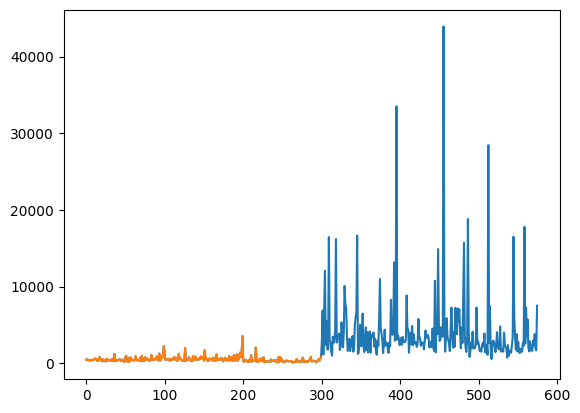

  File "C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\ipykernel\kernelapp.py", line 728, in start
    self.io_loop.start()
  File "C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\asyncio\base_events.py", line 570, in run_forever
    self._run_once()
  File

In [20]:
dec.get_is_bright(th_dic = {0:0,1:0,2:0})
viewer = dec.plot_points(genes=['Ptbp1','Flt1','Sox9','Gad1','Pvalb','Ptbp2','Sox11','Dcx'],
                         cols=['r','g','b','c','y','orange','w','m','purple'])

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00, 11.20it/s]


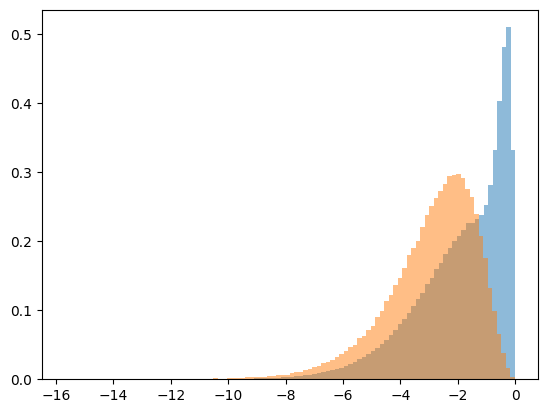

In [315]:
H = np.median(dec.XH_pruned[...,4],axis=1)
Hd = np.std(dec.XH_pruned[...,4],axis=1)/H
D = dec.XH_pruned[...,:3]-np.mean(dec.XH_pruned[...,:3],axis=1)[:,np.newaxis]
D = np.mean(np.linalg.norm(D,axis=-1),axis=-1)
score = np.array([H,-D])
scoreA = np.argsort(np.argsort(score,axis=-1),axis=-1)+1
scoreA = np.sum(np.log(scoreA)-np.log(len(D)),axis=0)

bad_igns = [ign for ign,gn in enumerate(dec.gns_names) if 'blank' in gn.lower()]
good_igns = [ign for ign,gn in enumerate(dec.gns_names) if 'blank' not in gn.lower()]
is_good_gn = np.in1d(dec.icodesN,good_igns)
is_gn = dec.icodesN==(list(dec.gns_names).index('Aqp4'))
plt.hist(scoreA[is_good_gn],density=True,bins=100,alpha=0.5)
plt.hist(scoreA[~is_good_gn],density=True,bins=100,alpha=0.5);

In [19]:
th = -0.75
print(np.mean(scoreA[~is_good_gn]>th),np.mean(scoreA[is_good_gn]>th))
nbds = np.sum(scoreA[~is_good_gn]>th)/len(bad_igns)
ngds = np.sum(scoreA[is_good_gn]>th)/len(good_igns)
print(nbds/ngds,nbds,ngds)

0.03578260292475738 0.2610676895853545
0.015979229822232537 15.276666666666667 956.0327272727272


In [325]:
dec.gns_names[-300:]

array(['blank0276', 'blank0277', 'blank0278', 'blank0279', 'blank0280',
       'blank0281', 'blank0282', 'blank0283', 'blank0284', 'blank0285',
       'blank0286', 'blank0287', 'blank0288', 'blank0289', 'blank0290',
       'blank0291', 'blank0292', 'blank0293', 'blank0294', 'blank0295',
       'blank0296', 'blank0297', 'blank0298', 'blank0299', 'blank0300',
       'Acer3', 'Actg1', 'Adcy2', 'Ahcyl2', 'Aldoc', 'Ascl1', 'Auts2',
       'Bhlhe22', 'Bmp2', 'Bsg', 'C1qa', 'Calb1', 'Cck', 'Cdh12', 'Cdk4',
       'Chrdl1', 'Cnr1', 'Csmd1', 'Cst3', 'Dgat2', 'Dlx1', 'Dsp',
       'Eif4a2', 'Emx2', 'Eomes', 'Fam107a', 'Flt1', 'Foxa2', 'Foxg1',
       'Gabbr1', 'Gad1', 'Gja1', 'Gpc4', 'Grb14', 'Grin2c', 'Hapln2',
       'Hmgn3', 'Id3', 'Igfbpl1', 'Kcnd2', 'Lhx3', 'Lockd', 'Lrp1b',
       'Mal', 'Mapk4', 'Mbp', 'Mgat4c', 'Mrc1', 'Myc', 'Nckap5',
       'Neurod1', 'Neurod6', 'Nfia', 'Nkain4', 'Nog', 'Npy2r', 'Nrgn',
       'Ntng1', 'Ogt', 'Olr1', 'Padi2', 'Pam', 'Pde1a', 'Plekha1', 'Pnoc',
       '

In [295]:
Xcms[is_gn][keep_gn].shape

(1241, 10)

In [282]:
len(bad_igns),len(good_igns)

(300, 275)

In [279]:
scoreA.shape,np.sum(scoreA[is_good_gn]>-2.5)

((1257484,), 550023)

In [264]:
dec.gns_names

array(['blank0001', 'blank0002', 'blank0003', 'blank0004', 'blank0005',
       'blank0006', 'blank0007', 'blank0008', 'blank0009', 'blank0010',
       'blank0011', 'blank0012', 'blank0013', 'blank0014', 'blank0015',
       'blank0016', 'blank0017', 'blank0018', 'blank0019', 'blank0020',
       'blank0021', 'blank0022', 'blank0023', 'blank0024', 'blank0025',
       'blank0026', 'blank0027', 'blank0028', 'blank0029', 'blank0030',
       'blank0031', 'blank0032', 'blank0033', 'blank0034', 'blank0035',
       'blank0036', 'blank0037', 'blank0038', 'blank0039', 'blank0040',
       'blank0041', 'blank0042', 'blank0043', 'blank0044', 'blank0045',
       'blank0046', 'blank0047', 'blank0048', 'blank0049', 'blank0050',
       'blank0051', 'blank0052', 'blank0053', 'blank0054', 'blank0055',
       'blank0056', 'blank0057', 'blank0058', 'blank0059', 'blank0060',
       'blank0061', 'blank0062', 'blank0063', 'blank0064', 'blank0065',
       'blank0066', 'blank0067', 'blank0068', 'blank0069', 'blan

In [213]:
args = np.argsort(np.argsort([9,1,2,3,4,8]))

In [214]:
args

array([5, 0, 1, 2, 3, 4], dtype=int64)

In [173]:
a,b=100,30
for i in range(10):
    a,b=a/a/b,b/a/b
    print(a,b)

0.03333333333333333 0.01
100.0 30.0
0.03333333333333333 0.01
100.0 30.0
0.03333333333333333 0.01
100.0 30.0
0.03333333333333333 0.01
100.0 30.0
0.03333333333333333 0.01
100.0 30.0


In [170]:
dec.XH_pruned[:,:,4],dec.XH_pruned[:,:,-3]

(array([[54936.7109375 , 55784.0234375 , 52976.23046875, 53666.921875  ],
        [56435.5625    , 56999.92578125, 55034.5859375 , 55161.62109375],
        [57354.2578125 , 57367.49609375, 57445.1953125 , 57026.90625   ],
        ...,
        [  506.35668945,   532.39770508,   512.05102539,   507.0144043 ],
        [  523.11450195,   513.89233398,   505.27099609,   510.73120117],
        [  519.83007812,   501.97753906,   507.46484375,   508.96337891]]),
 array([[54936.7109375 , 55784.0234375 , 52976.23046875, 53666.921875  ],
        [56435.5625    , 56999.92578125, 55034.5859375 , 55161.62109375],
        [57354.2578125 , 57367.49609375, 57445.1953125 , 57026.90625   ],
        ...,
        [  506.35668945,   532.39770508,   512.05102539,   507.0144043 ],
        [  523.11450195,   513.89233398,   505.27099609,   510.73120117],
        [  519.83007812,   501.97753906,   507.46484375,   508.96337891]]))

In [169]:
apply_brightness_correction(dec)

  4%|███▍                                                                               | 2/48 [00:00<00:05,  8.26it/s]

0 1.0735344261277961 105743
1 1.1612388437043955 119220


  8%|██████▉                                                                            | 4/48 [00:00<00:05,  7.83it/s]

2 1.1597179076894526 127383
3 1.0174593941220076 136537


 12%|██████████▍                                                                        | 6/48 [00:00<00:05,  8.08it/s]

4 0.9924827251760142 153022
5 0.9379327883658864 91920


 17%|█████████████▊                                                                     | 8/48 [00:01<00:05,  7.12it/s]

6 0.9869958845839988 131298
7 1.0031950550371591 180022


 21%|█████████████████                                                                 | 10/48 [00:01<00:05,  7.59it/s]

8 0.9225507054368287 105695
9 0.9593935083523599 120995


 25%|████████████████████▌                                                             | 12/48 [00:01<00:04,  7.34it/s]

10 0.9279623933915375 115710
11 0.9330269580704613 115831


 29%|███████████████████████▉                                                          | 14/48 [00:01<00:04,  6.99it/s]

12 0.9743820703926829 125372
13 0.9409013777346191 134373


 31%|█████████████████████████▋                                                        | 15/48 [00:02<00:05,  6.05it/s]

14 0.9583146034598296 137166


 35%|█████████████████████████████                                                     | 17/48 [00:02<00:05,  5.84it/s]

15 0.9880984022022441 124061
16 0.9672519518816757 156415


 40%|████████████████████████████████▍                                                 | 19/48 [00:02<00:04,  6.24it/s]

17 1.0092646811037285 127725
18 0.9790943685137408 135359


 44%|███████████████████████████████████▉                                              | 21/48 [00:03<00:04,  6.27it/s]

19 0.9747997657421947 123569
20 1.034641671896533 112626


 48%|███████████████████████████████████████▎                                          | 23/48 [00:03<00:04,  5.83it/s]

21 0.9962776515038618 128585
22 1.012844180006087 140339


 52%|██████████████████████████████████████████▋                                       | 25/48 [00:03<00:03,  6.74it/s]

23 0.9564723864158069 91886
24 0.9521051484835202 58599


 56%|██████████████████████████████████████████████▏                                   | 27/48 [00:03<00:02,  7.59it/s]

25 0.9919912539135858 83343
26 1.017017932403652 66658


 60%|█████████████████████████████████████████████████▌                                | 29/48 [00:04<00:02,  7.85it/s]

27 0.9721617248587708 97342
28 0.9588763845511212 74638


 65%|████████████████████████████████████████████████████▉                             | 31/48 [00:04<00:02,  7.65it/s]

29 0.9582758975000514 84948
30 0.9853264207258663 79384


 69%|████████████████████████████████████████████████████████▍                         | 33/48 [00:04<00:01,  7.66it/s]

31 0.9560856584909363 140169
32 0.9782407657169275 78460


 73%|███████████████████████████████████████████████████████████▊                      | 35/48 [00:04<00:01,  7.50it/s]

33 1.0261921721912648 94949
34 0.9636357638263618 79513


 77%|███████████████████████████████████████████████████████████████▏                  | 37/48 [00:05<00:01,  7.25it/s]

35 0.9586398661436736 62667
36 1.0322174639108748 97924


 81%|██████████████████████████████████████████████████████████████████▋               | 39/48 [00:05<00:01,  7.38it/s]

37 1.0625087776887163 91352
38 1.0389853832040474 82427


 85%|██████████████████████████████████████████████████████████████████████            | 41/48 [00:05<00:00,  7.58it/s]

39 0.9620202258088395 58630
40 1.0018461276741562 111464


 90%|█████████████████████████████████████████████████████████████████████████▍        | 43/48 [00:06<00:00,  7.15it/s]

41 1.0524384683610815 85099
42 1.0263541134025136 84112


 94%|████████████████████████████████████████████████████████████████████████████▉     | 45/48 [00:06<00:00,  7.80it/s]

43 1.0203883910315907 95043
44 1.0139002097868706 47788
45 0.947673596577425 52186


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:06<00:00,  7.23it/s]


46 1.0175895646598478 119704
47 0.9619569630001895 62685


  4%|███▍                                                                               | 2/48 [00:00<00:05,  8.06it/s]

0 1.0735344261277961 105743
1 1.1612388437043955 119220


  8%|██████▉                                                                            | 4/48 [00:00<00:05,  7.66it/s]

2 1.1597179076894526 127383
3 1.0174593941220076 136537


 12%|██████████▍                                                                        | 6/48 [00:00<00:05,  8.05it/s]

4 0.9924827251760142 153022
5 0.9379327883658864 91920


 17%|█████████████▊                                                                     | 8/48 [00:01<00:05,  7.46it/s]

6 0.9869958845839988 131298
7 1.0031950550371591 180022


 21%|█████████████████                                                                 | 10/48 [00:01<00:04,  7.82it/s]

8 0.9225507054368287 105695
9 0.9593935083523599 120995


 25%|████████████████████▌                                                             | 12/48 [00:01<00:04,  7.93it/s]

10 0.9279623933915375 115710
11 0.9330269580704613 115831


 29%|███████████████████████▉                                                          | 14/48 [00:01<00:04,  7.86it/s]

12 0.9743820703926829 125372
13 0.9409013777346191 134373


 33%|███████████████████████████▎                                                      | 16/48 [00:02<00:04,  7.79it/s]

14 0.9583146034598296 137166
15 0.9880984022022441 124061


 38%|██████████████████████████████▊                                                   | 18/48 [00:02<00:04,  6.63it/s]

16 0.9672519518816757 156415
17 1.0092646811037285 127725


 42%|██████████████████████████████████▏                                               | 20/48 [00:02<00:03,  7.00it/s]

18 0.9790943685137408 135359
19 0.9747997657421947 123569


 46%|█████████████████████████████████████▌                                            | 22/48 [00:02<00:03,  7.00it/s]

20 1.034641671896533 112626
21 0.9962776515038618 128585


 50%|█████████████████████████████████████████                                         | 24/48 [00:03<00:03,  6.23it/s]

22 1.012844180006087 140339
23 0.9564723864158069 91886


 54%|████████████████████████████████████████████▍                                     | 26/48 [00:03<00:03,  7.06it/s]

24 0.9521051484835202 58599
25 0.9919912539135858 83343


 58%|███████████████████████████████████████████████▊                                  | 28/48 [00:03<00:02,  7.40it/s]

26 1.017017932403652 66658
27 0.9721617248587708 97342


 62%|███████████████████████████████████████████████████▎                              | 30/48 [00:04<00:02,  8.00it/s]

28 0.9588763845511212 74638
29 0.9582758975000514 84948


 65%|████████████████████████████████████████████████████▉                             | 31/48 [00:04<00:02,  7.61it/s]

30 0.9853264207258663 79384


 69%|████████████████████████████████████████████████████████▍                         | 33/48 [00:04<00:02,  6.55it/s]

31 0.9560856584909363 140169
32 0.9782407657169275 78460


 73%|███████████████████████████████████████████████████████████▊                      | 35/48 [00:04<00:01,  7.47it/s]

33 1.0261921721912648 94949
34 0.9636357638263618 79513


 77%|███████████████████████████████████████████████████████████████▏                  | 37/48 [00:05<00:01,  7.32it/s]

35 0.9586398661436736 62667
36 1.0322174639108748 97924


 81%|██████████████████████████████████████████████████████████████████▋               | 39/48 [00:05<00:01,  7.45it/s]

37 1.0625087776887163 91352
38 1.0389853832040474 82427


 85%|██████████████████████████████████████████████████████████████████████            | 41/48 [00:05<00:00,  7.89it/s]

39 0.9620202258088395 58630
40 1.0018461276741562 111464


 90%|█████████████████████████████████████████████████████████████████████████▍        | 43/48 [00:05<00:00,  7.89it/s]

41 1.0524384683610815 85099
42 1.0263541134025136 84112


 94%|████████████████████████████████████████████████████████████████████████████▉     | 45/48 [00:06<00:00,  8.47it/s]

43 1.0203883910315907 95043
44 1.0139002097868706 47788


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 47/48 [00:06<00:00,  7.92it/s]

45 0.947673596577425 52186
46 1.0175895646598478 119704


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:06<00:00,  7.45it/s]


47 0.9619569630001895 62685


  4%|███▍                                                                               | 2/48 [00:00<00:06,  6.75it/s]

0 1.0735344261277961 105743
1 1.1612388437043955 119220


  8%|██████▉                                                                            | 4/48 [00:00<00:06,  6.53it/s]

2 1.1597179076894526 127383
3 1.0174593941220076 136537


 12%|██████████▍                                                                        | 6/48 [00:00<00:05,  7.06it/s]

4 0.9924827251760142 153022
5 0.9379327883658864 91920


 17%|█████████████▊                                                                     | 8/48 [00:01<00:05,  6.98it/s]

6 0.9869958845839988 131298
7 1.0031950550371591 180022


 21%|█████████████████                                                                 | 10/48 [00:01<00:05,  7.49it/s]

8 0.9225507054368287 105695
9 0.9593935083523599 120995


 25%|████████████████████▌                                                             | 12/48 [00:01<00:04,  7.86it/s]

10 0.9279623933915375 115710
11 0.9330269580704613 115831


 29%|███████████████████████▉                                                          | 14/48 [00:01<00:04,  7.75it/s]

12 0.9743820703926829 125372
13 0.9409013777346191 134373


 33%|███████████████████████████▎                                                      | 16/48 [00:02<00:04,  7.76it/s]

14 0.9583146034598296 137166
15 0.9880984022022441 124061


 38%|██████████████████████████████▊                                                   | 18/48 [00:02<00:03,  7.79it/s]

16 0.9672519518816757 156415
17 1.0092646811037285 127725


 42%|██████████████████████████████████▏                                               | 20/48 [00:02<00:03,  7.36it/s]

18 0.9790943685137408 135359
19 0.9747997657421947 123569


 46%|█████████████████████████████████████▌                                            | 22/48 [00:03<00:03,  6.91it/s]

20 1.034641671896533 112626
21 0.9962776515038618 128585


 50%|█████████████████████████████████████████                                         | 24/48 [00:03<00:03,  6.69it/s]

22 1.012844180006087 140339
23 0.9564723864158069 91886


 54%|████████████████████████████████████████████▍                                     | 26/48 [00:03<00:02,  7.58it/s]

24 0.9521051484835202 58599
25 0.9919912539135858 83343


 58%|███████████████████████████████████████████████▊                                  | 28/48 [00:03<00:02,  7.53it/s]

26 1.017017932403652 66658
27 0.9721617248587708 97342


 62%|███████████████████████████████████████████████████▎                              | 30/48 [00:04<00:02,  7.19it/s]

28 0.9588763845511212 74638
29 0.9582758975000514 84948


 67%|██████████████████████████████████████████████████████▋                           | 32/48 [00:04<00:02,  7.05it/s]

30 0.9853264207258663 79384
31 0.9560856584909363 140169


 71%|██████████████████████████████████████████████████████████                        | 34/48 [00:04<00:01,  7.45it/s]

32 0.9782407657169275 78460
33 1.0261921721912648 94949


 75%|█████████████████████████████████████████████████████████████▌                    | 36/48 [00:04<00:01,  6.91it/s]

34 0.9636357638263618 79513
35 0.9586398661436736 62667


 79%|████████████████████████████████████████████████████████████████▉                 | 38/48 [00:05<00:01,  7.16it/s]

36 1.0322174639108748 97924
37 1.0625087776887163 91352


 81%|██████████████████████████████████████████████████████████████████▋               | 39/48 [00:05<00:01,  7.31it/s]

38 1.0389853832040474 82427
39 0.9620202258088395 58630


 88%|███████████████████████████████████████████████████████████████████████▊          | 42/48 [00:05<00:00,  7.36it/s]

40 1.0018461276741562 111464
41 1.0524384683610815 85099


 92%|███████████████████████████████████████████████████████████████████████████▏      | 44/48 [00:06<00:00,  6.87it/s]

42 1.0263541134025136 84112
43 1.0203883910315907 95043


 96%|██████████████████████████████████████████████████████████████████████████████▌   | 46/48 [00:06<00:00,  7.94it/s]

44 1.0139002097868706 47788
45 0.947673596577425 52186


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:06<00:00,  7.31it/s]

46 1.0175895646598478 119704
47 0.9619569630001895 62685


In [10]:
import napari
napari.view_labels(im_segm_)


Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 374.5, 374.5), zoom=0.7030000000000001, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(4.0, 1.0, 0.0), scaled=True, size=10, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=3, ndisplay=2, last_used=0, range=((0.0, 8.0, 1.0), (0.0, 750.0, 1.0), (0.0, 750.0, 1.0)), current_step=(4, 375, 375), order=(0, 1, 2), axis_labels=('0', '1', '2')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Labels layer 'im_segm_' at 0x1746046af40>], scale_bar=ScaleBar(visible=False, colored=False, color=array([1., 0., 1., 1.], dtype=float32), ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10.0, box=False, box_color=array([0. , 0. , 0. , 0.6], dtype=float32), unit=None), text_overlay=TextOverlay(visible=False, color=array([0.5, 0.5, 0.5, 1. ], dtype=float32), font_size=10.0, position=<TextOverlayPosition.TO

In [15]:
#np.sort([fov for fov,set_ in dec.fov_sets if set_=='_set2'])

In [25]:
glob.glob(dec.save_folder+os.sep+'*Seg*')

[]